Use this utlity to update the correlations between asset classes in universe/asset-prices.csv

input files:
- asset-classes-2-etf.csv: mapping of asset classes to a representative ETF to use for calculating correlations
- asset-classes-in.csv: asset pairs for which to calculate correlations

output files:
- symbols-cache/'symbol'.csv: timeseries for each symbol 
- symbols-timeseries.csv: compiled timeseries for symbols
- asset-classes.csv: asset class pairs with correlations

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import brownbear as bb

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [3]:
# Set size of inline plots.
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Globals

In [4]:
# Set refresh_timeseries=True to download timeseries.  Otherwise /symbol-cache is used.
refresh_timeseries = False

In [5]:
# asset2etf dict provides a mapping from the asset name to a representative ETF.
asset2etf = pd.read_csv('asset-classes-2-etf.csv', skip_blank_lines=True, comment='#')
asset2etf = asset2etf.set_index(['Asset Class'])
asset2etf = asset2etf['ETF'].to_dict()
asset2etf

{'US Stocks': 'VTSMX',
 'Global Stocks': 'VXUS',
 'US Bonds': 'AGG',
 'Global Bonds': 'BNDX',
 'Cash Equivalents': 'BIL',
 'Real Estate': 'VNQ',
 'Commodities': 'DBC',
 'Currencies': 'DBV',
 'Managed Futures': 'FUT',
 'Balanced': 'AOM',
 'Risk-Free Asset': 'BIL',
 'US Stocks:Large Cap': 'SPY',
 'US Stocks:Mid Cap': 'MDY',
 'US Stocks:Small Cap': 'IWM',
 'US Stocks:Growth': 'QQQ',
 'US Stocks:Growth and Income': 'VOO',
 'US Stocks:Value': 'IWD',
 'US Stocks:Total Stock Market': 'VTI',
 'US Stocks:Materials': 'XLB',
 'US Stocks:Communication Services': 'XLC',
 'US Stocks:Energy': 'XLE',
 'US Stocks:Financials': 'XLF',
 'US Stocks:Industrials': 'XLI',
 'US Stocks:Technology': 'XLK',
 'US Stocks:Consumer Staples': 'XLP',
 'US Stocks:Real Estate': 'XLRE',
 'US Stocks:Utilities': 'XLU',
 'US Stocks:Healthcare': 'XLV',
 'US Stocks:Consumer Discretionary': 'XLY',
 'Global Stocks:Asia': 'VPL',
 'Global Stocks:Developed Markets': 'EFA',
 'Global Stocks:Emerging Markets': 'EEM',
 'Global Stocks:E

In [6]:
symbols = set(asset2etf.values())

In [7]:
bb.fetch_timeseries(symbols, refresh=refresh_timeseries)
bb.compile_timeseries(symbols)

.....................................................................


In [10]:
df = pd.read_csv('symbols-timeseries.csv', skip_blank_lines=True, comment='#')
df.set_index("Date", inplace=True)
df

,XLB,EFA,CANE,IWM,EEM,BNDX,JPST,BWX,BIL,VPL,...,XLY,TIP,SLV,IEI,DBV,XLU,CORN,XLC,VOO,FUT
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,42.14,50.45,11.59,109.13,33.47,44.97,NaN,26.38,87.21,48.20,...,65.50,100.66,15.11,110.66,24.63,38.14,26.48,NaN,166.14,NaN
2015-01-05,41.07,49.26,11.45,107.67,32.87,44.96,NaN,26.32,87.23,47.60,...,64.25,100.75,15.50,110.91,24.62,37.67,27.12,NaN,163.22,NaN
2015-01-06,40.70,48.70,11.86,105.81,32.73,45.06,NaN,26.41,87.21,47.11,...,63.61,100.75,15.83,111.25,24.53,37.70,27.05,NaN,161.62,NaN
2015-01-07,41.16,49.24,11.71,107.11,33.44,45.03,NaN,26.33,87.21,47.72,...,64.62,100.83,15.85,111.35,24.71,38.07,26.52,NaN,163.64,NaN
2015-01-08,42.14,49.91,12.07,108.93,34.01,45.01,NaN,26.30,87.21,48.30,...,65.59,100.67,15.64,111.22,24.99,38.33,26.38,NaN,166.51,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-18,89.14,71.60,10.12,197.62,44.08,51.33,50.22,25.03,91.42,70.81,...,178.94,121.13,23.87,120.16,26.79,75.68,29.85,66.26,402.59,42.03
2022-04-19,89.98,71.94,9.84,201.56,43.86,51.23,50.22,24.86,91.41,71.14,...,184.13,120.53,23.24,119.53,26.82,76.17,29.67,67.58,409.02,41.95
2022-04-20,90.55,72.42,9.82,202.33,43.60,51.31,50.22,25.03,91.43,71.58,...,181.76,121.42,23.28,119.90,26.82,76.79,29.88,64.65,408.71,41.84


0.7968472191390736

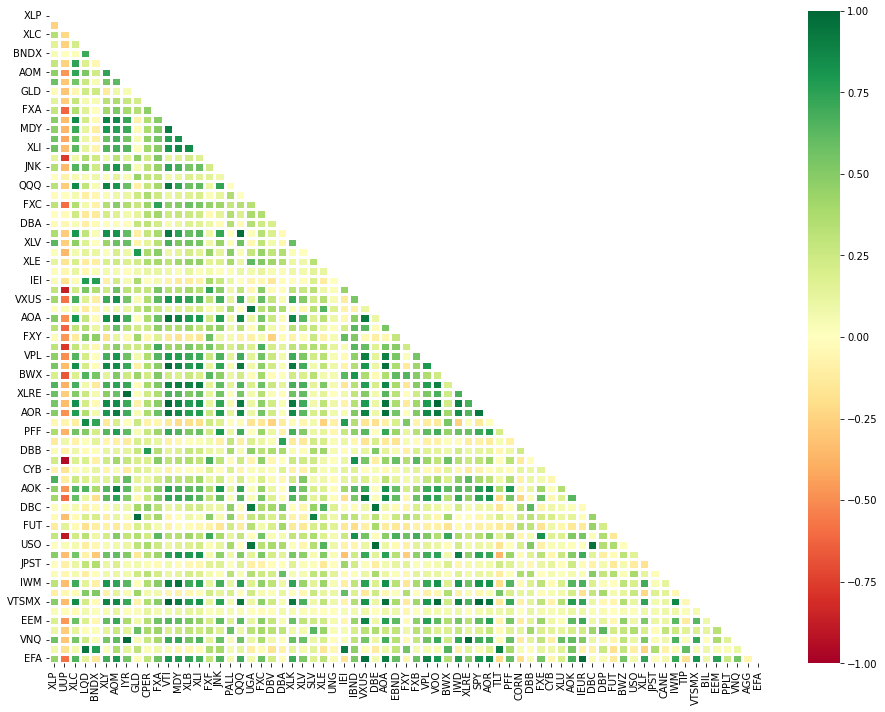

In [9]:
corr_map = bb.correlation_map(df, method='log', days=bb.TRADING_DAYS_PER_YEAR)
# Sample correlation value.
corr_map['SPY']['VXUS']

In [10]:
# Read asset-classes-in.csv
lines = []
with open('asset-classes-in.csv', 'r') as f:
    lines = [line.strip() for line in f]
#lines

In [11]:
# Calculate the pair correlations between the assets and write the resuls to a list.
out = []
for line in lines:
    # Copy empty and comment lines.
    if not line or line.startswith('#'):
        out.append(line)
        continue
    # Split line by comma delimiter; strip the fields.
    fields = line.split(',')
    fields = [field.strip() for field in fields]
    assetA = fields[0].strip('\"')
    assetB = fields[1].strip('\"')
    # copy same asset lines and header
    if assetA == assetB or assetA == 'Asset Class A':
        out.append(line)
        continue
    # Use asset2etf to get a representative ETF for the asset,
    # then calculate the correlation.  The ETF pair correlation is
    # a proxy for the correlation of an asset pair.
    etfA = asset2etf[assetA]
    etfB = asset2etf[assetB]
    corrAB = corr_map.loc[etfA, etfB]
    out.append(f'"{assetA}","{assetB}","{corrAB:0.2f}"')   

In [12]:
# Write out asset-classes.csv
with open('asset-classes.csv', 'w') as f:
    for line in out:
        f.write(line + '\n')

In [13]:
# Sample symbol.
symbol = 'SPY'

In [14]:
annual_returns = bb.annualized_returns(df, timeperiod='daily', years=1)
annual_returns[symbol]

2.566069457768827

In [15]:
# Calculate 1 month, 3 months, 1 year, 3 year, and 5 year annualized returns.
annual_returns_1mo = bb.annualized_returns(df, timeperiod='daily', years=1/12)
annual_returns_3mo = bb.annualized_returns(df, timeperiod='daily', years=3/12)
annual_returns_1yr = bb.annualized_returns(df, timeperiod='daily', years=1)
annual_returns_3yr = bb.annualized_returns(df, timeperiod='daily', years=3)
annual_returns_5yr = bb.annualized_returns(df, timeperiod='daily', years=5)

In [16]:
# Calculate 20 day annualized volatility.
daily_returns = df.pct_change()
years = bb.TRADING_DAYS_PER_MONTH / bb.TRADING_DAYS_PER_YEAR
vola = bb.annualized_standard_deviation(daily_returns, timeperiod='daily', years=years)
vola[symbol]

0.179520311561159

In [17]:
# Calculate 20 day annualized downside volatility.
ds_vola = bb.annualized_standard_deviation(daily_returns, timeperiod='daily', years=years, downside=True)
ds_vola[symbol]

0.12398966075855984

In [18]:
# Resample df on a monthly basis.
df.index = pd.to_datetime(df.index)
monthly = df.resample('M').ffill()
bb.print_full(monthly[symbol])

Date
2015-01-31   176.27
2015-02-28   186.18
2015-03-31   183.25
2015-04-30   185.06
2015-05-31   187.44
2015-06-30   183.63
2015-07-31   187.78
2015-08-31   176.33
2015-09-30   171.83
2015-10-31   186.45
2015-11-30   187.13
2015-12-31   183.90
2016-01-31   174.74
2016-02-29   174.60
2016-03-31   186.34
2016-04-30   187.07
2016-05-31   190.26
2016-06-30   190.92
2016-07-31   197.88
2016-08-31   198.12
2016-09-30   198.13
2016-10-31   194.69
2016-11-30   201.87
2016-12-31   205.96
2017-01-31   209.64
2017-02-28   217.88
2017-03-31   218.15
2017-04-30   220.32
2017-05-31   223.43
2017-06-30   224.85
2017-07-31   229.47
2017-08-31   230.14
2017-09-30   234.78
2017-10-31   240.31
2017-11-30   247.66
2017-12-31   250.66
2018-01-31   264.79
2018-02-28   255.16
2018-03-31   248.17
2018-04-30   249.45
2018-05-31   255.51
2018-06-30   256.98
2018-07-31   266.50
2018-08-31   275.01
2018-09-30   276.65
2018-10-31   257.53
2018-11-30   262.31
2018-12-31   239.21
2019-01-31   258.36
2019-02-28   26

In [19]:
# Calculate monthly returns.
monthly_returns = monthly.pct_change()
monthly_returns['SPY']

Date
2015-01-31     NaN
2015-02-28    0.06
2015-03-31   -0.02
2015-04-30    0.01
2015-05-31    0.01
              ... 
2021-12-31    0.04
2022-01-31   -0.05
2022-02-28   -0.03
2022-03-31    0.03
2022-04-30   -0.06
Freq: M, Name: SPY, Length: 88, dtype: float64

In [20]:
# Calculate 3 year annualized standard deviation.
std_dev = bb.annualized_standard_deviation(monthly_returns, timeperiod='monthly', years=3)
std_dev[symbol]

0.17866380552169678

In [21]:
# Read investment-options-header.csv
lines = []
with open('investment-options-in.csv', 'r') as f:
    lines = [line.strip() for line in f]
lines

['# Description: S&P 500 investment options. 09/29/2020',
 '',
 '# Format',
 '"Investment Option","Asset Class","1 mo","3 mo","1 Yr","3 Yr","5 Yr","Vola","DS Vola","Std Dev"',
 '# Note: "Description" field is optional']

In [22]:
# For each symbol, write out the 1 Yr, 3 Yr, 5 Yr, and std dev.
out = lines.copy()

# This is still slow (2.53 s)
for key, value in asset2etf.items():

    symbol = value
    asset_class = key

    ret_1mo = annual_returns_1mo[symbol]
    ret_3mo = annual_returns_3mo[symbol]
    ret_1yr = annual_returns_1yr[symbol]
    ret_3yr = annual_returns_3yr[symbol]
    ret_5yr = annual_returns_5yr[symbol]

    if np.isnan(ret_3yr): ret_3yr = ret_1yr
    if np.isnan(ret_5yr): ret_5yr = ret_3yr
    
    _vola = vola[symbol]*100
    _ds_vola = ds_vola[symbol]*100
    sd = std_dev[symbol]*100

    out.append(
        '"{}","{}","{:0.2f}","{:0.2f}","{:0.2f}","{:0.2f}","{:0.2f}","{:0.2f}","{:0.2f}","{:0.2f}"'
        .format(asset_class, asset_class,
                ret_1mo, ret_3mo, ret_1yr, ret_3yr, ret_5yr, _vola, _ds_vola, sd)) 

In [23]:
# Write out asset-classes.csv
with open('investment-options.csv', 'w') as f:
    for line in out:
        f.write(line + '\n')